In [63]:
## import package
import pandas as pd
import numpy as np
import json
import time
import matplotlib.pyplot as plt
from wordcloud import WordCloud



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dotadescription = []
with open('/content/drive/MyDrive/Advanced analytics/Assignment 4/dotadescription.json', 'r') as f:
    for line in f:
        dotadescription.append(json.loads(line))

dotadescription = pd.DataFrame.from_dict(dotadescription)
dotadescription.head(20)

,Streamer,Followers,Description
0,gaules,3898413,Mais um guerreiro da Maior Tribo do Mundo! Atu...
1,n3koglai,2532024,Реклама и деловые предложения: kolyatwitch0@gm...
2,cdnthe3rd,2020358,Home of The Onward and Upward Vibrations and M...
3,jahrein,1852320,Twitch'in son kalesi!
4,sneakylol,1761598,Streamer :D
5,stray228,1416737,"Крепкий и скилловый мужчина, который обучает ф..."
6,beyondthesummit,1173329,Beyond The Summit is a broadcasting studio and...
7,dmitry_lixxx,1166723,
8,pokelawls,1065906,yo
9,cheatbanned,1029062,"Стример по имени Виктор, почта для предложений..."


In [4]:
loldescription = []
with open('/content/drive/MyDrive/Advanced analytics/Assignment 4/loldescription.json', 'r') as f:
    for line in f:
        loldescription.append(json.loads(line))

loldescription = pd.DataFrame.from_dict(loldescription)
loldescription.head(3)

,Streamer,Followers,Description
0,ibai,13035147,Si lees esto que sepas que te aprecio
1,thegrefg,11295622,"Hola, me llamo David aunque la gente me llama ..."
2,sodapoppin,8840346,"Wtf do i write here? Click my stream, or i scr..."


In [15]:
!pip install langdetect googletrans==4.0.0-rc1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 14.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 50.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 7.0 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=00187a7acca87dc9db82766f46f46ba58eff2c38f069359a32a78621813929cf
  Stored in dir

In [16]:
from langdetect import detect
from googletrans import Translator

## Detect language and translate description of dota

In [8]:
dotaall = []
with open("/content/drive/MyDrive/Advanced analytics/Assignment 4/dotaall.json", 'r') as f:
    for line in f:
        dotaall.append(json.loads(line))

dotaall = pd.DataFrame.from_dict(dotaall)
dotaall.head(5)

,Streamer,Followers,Min_views,Max_views,Avg_views,Other_games
0,gaules,3898413,0.0,190086.0,22245.0,40
1,n3koglai,2532024,7508.0,55176.0,18768.0,5
2,cdnthe3rd,2020358,697.0,2841.0,1490.0,13
3,jahrein,1852320,6311.0,115767.0,23223.0,10
4,sneakylol,1761598,574.0,7962.0,2841.0,13


In [10]:
dotaall = dotaall.merge(dotadescription[["Streamer", "Description"]], how = "left", 
                        left_on = "Streamer", right_on = "Streamer")

dotaall.head(5)

,Streamer,Followers,Min_views,Max_views,Avg_views,Other_games,Description
0,gaules,3898413,0.0,190086.0,22245.0,40,Mais um guerreiro da Maior Tribo do Mundo! Atu...
1,n3koglai,2532024,7508.0,55176.0,18768.0,5,Реклама и деловые предложения: kolyatwitch0@gm...
2,cdnthe3rd,2020358,697.0,2841.0,1490.0,13,Home of The Onward and Upward Vibrations and M...
3,jahrein,1852320,6311.0,115767.0,23223.0,10,Twitch'in son kalesi!
4,sneakylol,1761598,574.0,7962.0,2841.0,13,Streamer :D


In [12]:
dota_data = dotaall

In [13]:
dota_data["translated_texts"] = "1"
dota_data["language"] = "1"

In [14]:
dota_data.head(5)

,Streamer,Followers,Min_views,Max_views,Avg_views,Other_games,Description,translated_texts,language
0,gaules,3898413,0.0,190086.0,22245.0,40,Mais um guerreiro da Maior Tribo do Mundo! Atu...,1,1
1,n3koglai,2532024,7508.0,55176.0,18768.0,5,Реклама и деловые предложения: kolyatwitch0@gm...,1,1
2,cdnthe3rd,2020358,697.0,2841.0,1490.0,13,Home of The Onward and Upward Vibrations and M...,1,1
3,jahrein,1852320,6311.0,115767.0,23223.0,10,Twitch'in son kalesi!,1,1
4,sneakylol,1761598,574.0,7962.0,2841.0,13,Streamer :D,1,1


In [17]:
translator = Translator()

In [ ]:
## translated_text: It will take a very long time, only run when you really need (rerun to ensure we can translate the description as much as possible)
for i in range(0,len(dota_data["Description"])):
  if dota_data.iloc[i, 7] == "1" :
    try:
      translation = translator.translate(dota_data.iloc[i, 6], dest='en').text
      dota_data.iloc[i, 7] = translation
      time.sleep(5)

    except Exception as e:
      print(f"Error occurred: {str(e)}")
      print("Continuing after pause...")
      time.sleep(10)
      continue

In [ ]:
## only take the streamer does not play other games or have dota terms in their description

specific_terms = ['dota']

dota_data = dota_data.loc[(dota_data['translated_texts'].str.contains('|'.join(specific_terms), case=False))|(dota_data["Other_games"]==0),]


In [ ]:
## detect language: It will take a very long time, only run when you really need (rerun to ensure we can translate the description as much as possible)
for i in range(0,len(dota_data["Description"])):
  if dota_data.iloc[i, 8] == "1" :
    try:
      dota_data.iloc[i, 8] = translator.detect(dota_data.iloc[i, 6]).lang
      time.sleep(5)

    except Exception as e:
      print(f"Error occurred: {str(e)}")
      print("Continuing after pause...")
      time.sleep(10)
      continue


In [ ]:
dota_data.to_csv("dota_data.csv", index = False)

## Detect language and translate description of lol

In [18]:
lolall = []
with open("/content/drive/MyDrive/Advanced analytics/Assignment 4/lolall.json", 'r') as f:
    for line in f:
        lolall.append(json.loads(line))

lolall = pd.DataFrame.from_dict(lolall)
lolall.head(5)

,Streamer,Followers,Min_views,Max_views,Avg_views,Other_games
0,ibai,13035147,14218.0,394012.0,78567.0,8
1,thegrefg,11295622,4981.0,1651139.0,83245.0,9
2,sodapoppin,8840346,2813.0,60759.0,16377.0,37
3,riotgames,6528887,676.0,10194.0,3073.0,0
4,arigameplays,6070514,3795.0,105943.0,12043.0,7


In [19]:
lolall = lolall.merge(loldescription[["Streamer", "Description"]], how = "left", 
                        left_on = "Streamer", right_on = "Streamer")

lolall.head(5)

,Streamer,Followers,Min_views,Max_views,Avg_views,Other_games,Description
0,ibai,13035147,14218.0,394012.0,78567.0,8,Si lees esto que sepas que te aprecio
1,thegrefg,11295622,4981.0,1651139.0,83245.0,9,"Hola, me llamo David aunque la gente me llama ..."
2,sodapoppin,8840346,2813.0,60759.0,16377.0,37,"Wtf do i write here? Click my stream, or i scr..."
3,riotgames,6528887,676.0,10194.0,3073.0,0,"Welcome to the Riot Games channel, home of LoL..."
4,arigameplays,6070514,3795.0,105943.0,12043.0,7,"Hola, soy AriGameplays! ♥ Tengo 24 años y jue..."


In [21]:
lol_data = lolall

In [22]:
lol_data["translated_texts"] = "1"
lol_data["language"] = "1"

In [23]:
lol_data.head(5)

,Streamer,Followers,Min_views,Max_views,Avg_views,Other_games,Description,translated_texts,language
0,ibai,13035147,14218.0,394012.0,78567.0,8,Si lees esto que sepas que te aprecio,1,1
1,thegrefg,11295622,4981.0,1651139.0,83245.0,9,"Hola, me llamo David aunque la gente me llama ...",1,1
2,sodapoppin,8840346,2813.0,60759.0,16377.0,37,"Wtf do i write here? Click my stream, or i scr...",1,1
3,riotgames,6528887,676.0,10194.0,3073.0,0,"Welcome to the Riot Games channel, home of LoL...",1,1
4,arigameplays,6070514,3795.0,105943.0,12043.0,7,"Hola, soy AriGameplays! ♥ Tengo 24 años y jue...",1,1


In [24]:
translator = Translator()

In [ ]:
## translated_text: It will take a very long time, only run when you really need (rerun to ensure we can translate the description as much as possible)
for i in range(0,len(lol_data["Description"])):
  if lol_data.iloc[i, 7] == "1" :
    try:
      translation = translator.translate(lol_data.iloc[i, 6], dest='en').text
      lol_data.iloc[i, 7] = translation
      time.sleep(5)

    except Exception as e:
      print(f"Error occurred: {str(e)}")
      print("Continuing after pause...")
      time.sleep(10)
      continue

In [ ]:
## only take the streamer does not play other games or have lol terms in their description

specific_terms = ['league of legends', 'lol', "league of legend"]

lol_data = lol_data.loc[(lol_data['translated_texts'].str.contains('|'.join(specific_terms), case=False))|(lol_data["Other_games"]==0),]

In [ ]:
## detect language: It will take a very long time, only run when you really need (rerun to ensure we can translate the description as much as possible)
for i in range(0,len(lol_data["Description"])):
  if lol_data.iloc[i, 8] == "1" :
    try:
      lol_data.iloc[i, 8] = translator.detect(lol_data.iloc[i, 6]).lang
      time.sleep(5)

    except Exception as e:
      print(f"Error occurred: {str(e)}")
      print("Continuing after pause...")
      time.sleep(10)
      continue


In [ ]:
lol_data.to_csv("lol_data.csv", index = False)

## visualize data

In [38]:
dota_data.head(10)

,Streamer,Followers,Min_views,Max_views,Avg_views,Other_games,Description,translated_texts,language
0,stray228,1416737,6179.0,36943.0,11546.0,0,"Крепкий и скилловый мужчина, который обучает ф...",a strong and skill man who teaches chips in do...,ru
1,beyondthesummit,1173329,198.0,6000.0,2037.0,0,Beyond The Summit is a broadcasting studio and...,beyond the summit is a broadcasting studio and...,en
2,dendi,1004049,958.0,1344.0,1151.0,0,"Danylo ""Dendi"" Ishutin The founder of [B8 Espo...","danylo ""dendi"" ishutin the founder of [b8 essp...",om
3,dota2mc,694349,6771.0,21008.0,13693.0,0,Топовая студия в мире профессионального киберс...,top studio in the world of professional e -spo...,ru
4,esl_dota2,690810,1688.0,79922.0,36142.0,0,The ESL One Berlin Major is here! 18 teams fig...,the esl one berlin major is here! 18 teams fig...,en
5,dreadztv,690447,1041.0,7004.0,2708.0,12,"Человек, брат, сын, муж, отец. Андрей, 31 год....","man, brother, son, husband, father.andrey, 31 ...",ru
6,ybicanoooobov,649157,2723.0,11412.0,5327.0,0,Тут тебя ждет приятная ночная атмосфера и потн...,here you will find a pleasant night atmosphere...,ru
7,esl_dota2ember,580111,4328.0,25243.0,16594.0,0,The ESL One Berlin Major is here! 18 teams fig...,the esl one berlin major is here! 18 teams fig...,en
8,topsonous,522354,6182.0,16618.0,11508.0,0,Top Dog,top dog,en
9,tpabomah,520672,0.0,7792.0,2594.0,4,"Привет! Я бывший течиспикер, учил чемпиона TI ...","hello!i am a former terecker, taught the ti ch...",ru


In [53]:
lol_data.head(5)

,Streamer,Followers,Min_views,Max_views,Avg_views,Other_games,Description,translated_texts,language
0,riotgames,6528887,676.0,10194.0,3073.0,0.0,"Welcome to the Riot Games channel, home of LoL...","welcome to the riot games channel, home of lol...",en
1,nightblue3,2720066,1314.0,6347.0,3971.0,1.0,one of the league of legends players of all time,one of the league of legends players of all time,en
2,imaqtpie,2587299,974.0,6812.0,2536.0,9.0,Former pro player taking a break to show the r...,former pro player taking a break to show the r...,en
3,yoda,2407674,2450.0,20915.0,10894.0,10.0,"CEO da SehLoiro, apresentador do PlaYlist, CEO...","ceo of sehloiro, playlist host, yodismo bazaar...",pt
4,gosu,1989646,986.0,3306.0,2138.0,2.0,League of Legends ADC streamer. Business Inqui...,league of legends adc streamer. business inqui...,en


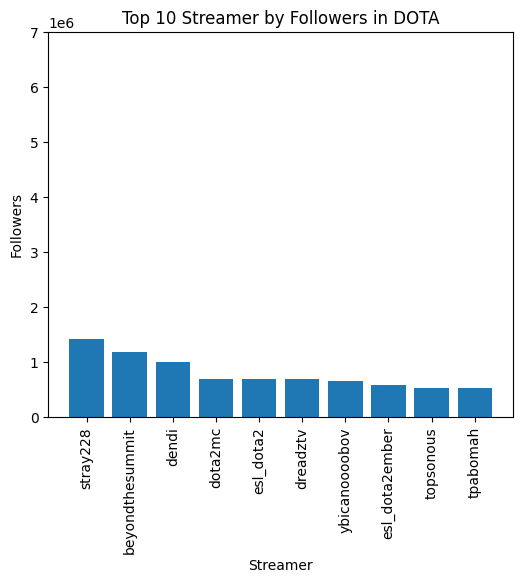

In [41]:
sorted_df = dota_data.sort_values('Followers', ascending=False)

# Select the top 10 rows
top_10_df = sorted_df.head(10)

# Extract labels and values
labels = top_10_df['Streamer']
values = top_10_df['Followers']

plt.rcParams['figure.figsize'] = [6, 5]


# Create a bar chart
plt.bar(labels, values)

# Add labels and title
plt.xlabel('Streamer')
plt.ylabel('Followers')
plt.title('Top 10 Streamer by Followers in DOTA')

# Set the y-axis limit
plt.ylim(0, 7000000)  # Change the values according to your desired limit



# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the chart
plt.show()

<ipython-input-60-7d70a9be1c14>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lol_data["Followers"]  = pd.to_numeric(lol_data["Followers"])


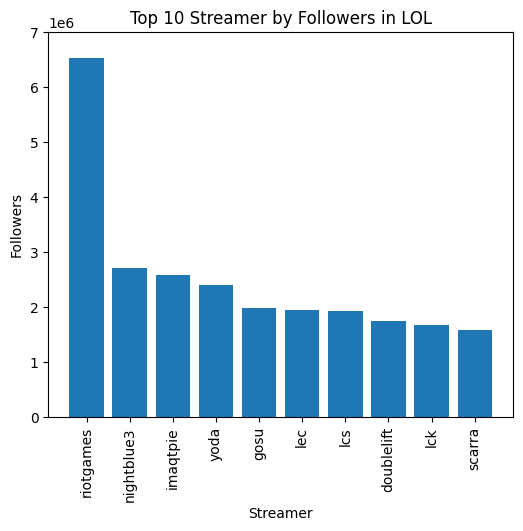

In [60]:
lol_data = lol_data.loc[~(lol_data.Avg_views.isnull()), ]
lol_data["Followers"]  = pd.to_numeric(lol_data["Followers"])
sorted_df = lol_data.sort_values('Followers', ascending=False)

# Select the top 10 rows
top_10_df = sorted_df.head(10)

# Extract labels and values
labels = top_10_df['Streamer']
values = top_10_df['Followers']

plt.rcParams['figure.figsize'] = [6, 5]


# Create a bar chart
plt.bar(labels, values)

# Add labels and title
plt.xlabel('Streamer')
plt.ylabel('Followers')
plt.title('Top 10 Streamer by Followers in LOL')

# Set the y-axis limit
plt.ylim(0, 7000000)  # Change the values according to your desired limit



# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the chart
plt.show()

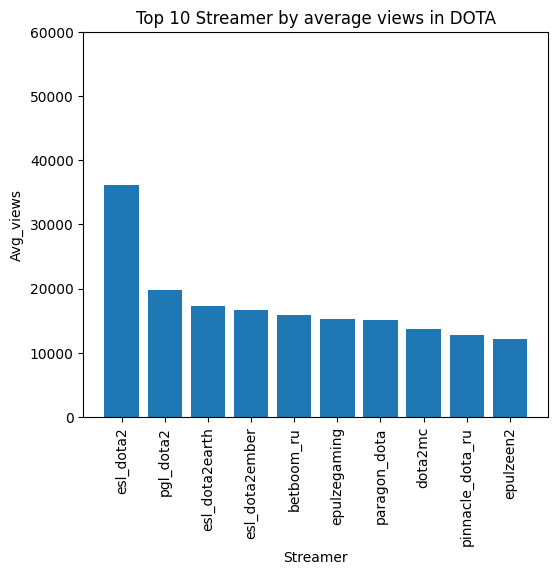

In [61]:
sorted_df = dota_data.sort_values('Avg_views', ascending=False)

# Select the top 10 rows
top_10_df = sorted_df.head(10)

# Extract labels and values
labels = top_10_df['Streamer']
values = top_10_df['Avg_views']

plt.rcParams['figure.figsize'] = [6, 5]

# Create a bar chart
plt.bar(labels, values)

# Add labels and title
plt.xlabel('Streamer')
plt.ylabel('Avg_views')
plt.title('Top 10 Streamer by average views in DOTA')

# Set the y-axis limit
plt.ylim(0, 60000)  # Change the values according to your desired limit


# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the chart
plt.show()

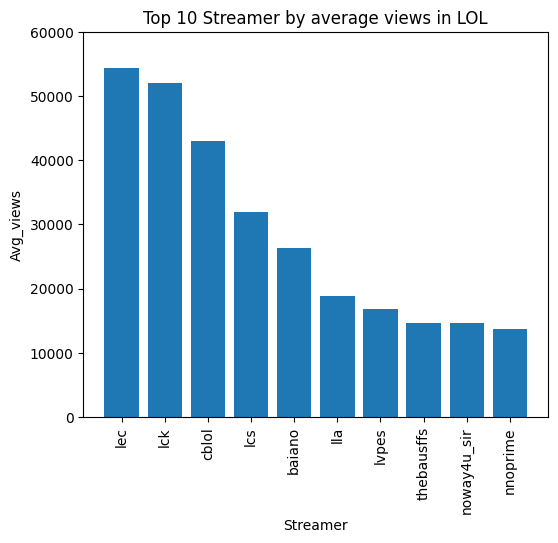

In [62]:
sorted_df = lol_data.sort_values('Avg_views', ascending=False)

# Select the top 10 rows
top_10_df = sorted_df.head(10)

# Extract labels and values
labels = top_10_df['Streamer']
values = top_10_df['Avg_views']

plt.rcParams['figure.figsize'] = [6, 5]


# Create a bar chart
plt.bar(labels, values)

# Add labels and title
plt.xlabel('Streamer')
plt.ylabel('Avg_views')
plt.title('Top 10 Streamer by average views in LOL')

# Set the y-axis limit
plt.ylim(0, 60000)  # Change the values according to your desired limit


# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the chart
plt.show()

In [65]:
import nltk
nltk.download('stopwords')


from nltk.corpus import stopwords
stop_words = list(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [69]:
stop_words.extend(["dota", "dota2", "league", "legends", "gmail", "na", "game", "com", "lol", "games", "stream"])

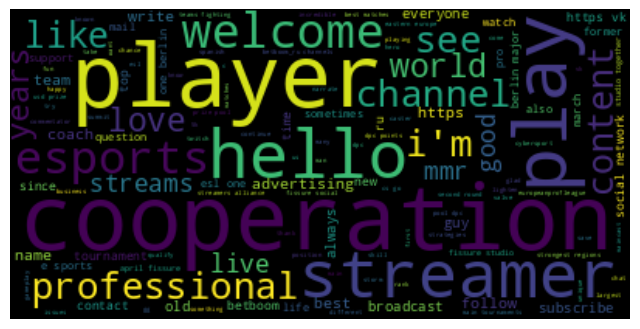

In [70]:
# Custom stop words list

text_data = " ".join(dota_data['translated_texts'].tolist())

# Create a WordCloud object with combined stop words
wordcloud = WordCloud(stopwords=set(stop_words))

# Generate the word cloud
wordcloud.generate(text_data)

plt.rcParams['figure.figsize'] = [8, 8]


# Display the word cloud using matplotlib
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

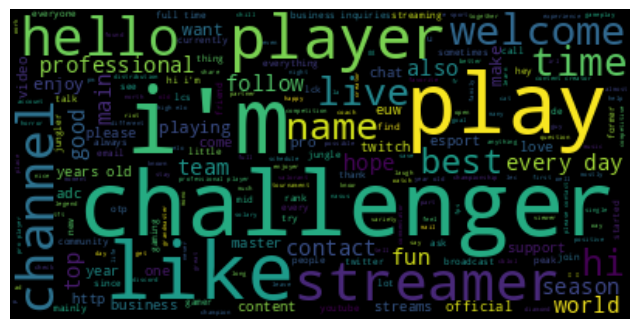

In [72]:
lol_data = lol_data.loc[~(lol_data.translated_texts.isnull()),]

text_data = " ".join(lol_data['translated_texts'].tolist())

# Create a WordCloud object with combined stop words
wordcloud = WordCloud(stopwords=set(stop_words))

# Generate the word cloud
wordcloud.generate(text_data)

plt.rcParams['figure.figsize'] = [8, 8]


# Display the word cloud using matplotlib
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

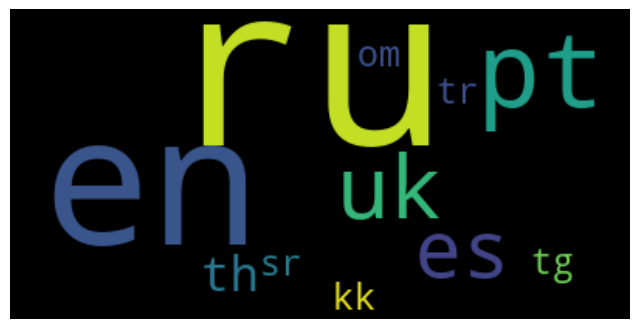

In [67]:
# Custom stop words list

text_data = " ".join(dota_data['language'].tolist())

# Create a WordCloud object with combined stop words
wordcloud = WordCloud(stopwords=set(stop_words))

# Generate the word cloud
wordcloud.generate(text_data)

plt.rcParams['figure.figsize'] = [8, 8]


# Display the word cloud using matplotlib
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

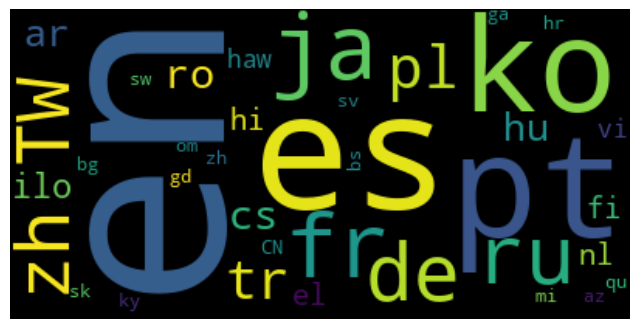

In [74]:

text_data = " ".join(lol_data['language'].tolist())

# Create a WordCloud object with combined stop words
wordcloud = WordCloud(stopwords=set(stop_words))

# Generate the word cloud
wordcloud.generate(text_data)

plt.rcParams['figure.figsize'] = [8, 8]


# Display the word cloud using matplotlib
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()